# 課題②演習1
## XGBoost

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

In [13]:
df = pd.read_csv("..//Data-science//data//breast_cancer_imbalance.csv")

df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169,1
1,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409,1
2,13.170,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,0.06777,...,27.95,102.80,759.4,0.17860,0.41660,0.500600,0.20880,0.3900,0.11790,0
3,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301,1
4,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917,1
5,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563,1
6,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025,1
7,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,0.1868,0.06110,...,21.33,83.67,527.2,0.11440,0.08906,0.092030,0.06296,0.2785,0.07408,1
8,11.520,18.75,73.34,409.0,0.09524,0.05473,0.030360,0.022780,0.1920,0.05907,...,22.47,81.81,506.2,0.12490,0.08720,0.090760,0.06316,0.3306,0.07036,1
9,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289,1


In [14]:
# 分類モデルでのデータ分割では，StratifiedKFoldを使う

skf = StratifiedKFold(n_splits = 5, shuffle = True)
df["fold"] = -1
for fold, (train_idx, test_idx) in enumerate(skf.split(X = df, y = df["target"])):
    df.loc[test_idx, "fold"] = fold
print(df["fold"].value_counts())

0    80
1    80
2    80
3    80
4    80
Name: fold, dtype: int64


In [15]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,fold
0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1,1
1,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1,3
2,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400,0.2128,0.06777,...,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790,0,3
3,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301,1,0
4,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917,1,0


In [16]:
fold = 0
train = df.loc[df["fold"] != fold].copy()
test = df.loc[df["fold"] == fold].copy()
print(train.shape, test.shape)

feat_cols = train.drop(columns = ["fold", "target"]).columns.tolist()
print(feat_cols)

X_train = train[feat_cols]
X_test = test[feat_cols]
y_train = train["target"]
y_test = test["target"]

(320, 32) (80, 32)
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [17]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

params = {
    "objective" : "binary:logistic",
    "eval_metric" : "logloss"
}

results_dict = {}
model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dtest, "valid")],
    num_boost_round = 100,
    early_stopping_rounds = 10,
    evals_result = results_dict
)

[0]	train-logloss:0.46013	valid-logloss:0.46780
[1]	train-logloss:0.32718	valid-logloss:0.33867
[2]	train-logloss:0.23960	valid-logloss:0.26403
[3]	train-logloss:0.18028	valid-logloss:0.20880
[4]	train-logloss:0.13882	valid-logloss:0.17529
[5]	train-logloss:0.10898	valid-logloss:0.14680
[6]	train-logloss:0.08570	valid-logloss:0.12946
[7]	train-logloss:0.06860	valid-logloss:0.11624
[8]	train-logloss:0.05485	valid-logloss:0.10491
[9]	train-logloss:0.04500	valid-logloss:0.09591
[10]	train-logloss:0.03748	valid-logloss:0.09194
[11]	train-logloss:0.03193	valid-logloss:0.08749
[12]	train-logloss:0.02755	valid-logloss:0.08492
[13]	train-logloss:0.02443	valid-logloss:0.08382
[14]	train-logloss:0.02136	valid-logloss:0.08369
[15]	train-logloss:0.01918	valid-logloss:0.08446
[16]	train-logloss:0.01730	valid-logloss:0.08532
[17]	train-logloss:0.01572	valid-logloss:0.08697
[18]	train-logloss:0.01438	valid-logloss:0.08811
[19]	train-logloss:0.01336	valid-logloss:0.08937
[20]	train-logloss:0.01267	val

- objective：binary:logistic, 二値分類
- eval_metric：logloss, 評価指標:logloss(予測結果が外れたとき、その予測確立が大きいほどペナルティを与える)

In [18]:
pred = model.predict(xgb.DMatrix(X_test))
print(pred)

[0.9980229  0.99561536 0.99854493 0.99854493 0.99561536 0.03664416
 0.99854493 0.99264115 0.99854493 0.9982229  0.99854493 0.9982231
 0.9982231  0.99854493 0.99854493 0.9978302  0.99854493 0.9973828
 0.99854493 0.99854493 0.99705553 0.9982229  0.99854493 0.99779415
 0.99854493 0.99680233 0.9965635  0.99854493 0.99854493 0.9982231
 0.99854493 0.9979917  0.99854493 0.99658316 0.9982231  0.99854493
 0.05169818 0.99854493 0.00554731 0.99854493 0.00493221 0.9982231
 0.99854493 0.99854493 0.9982231  0.99758613 0.9952063  0.9980229
 0.99854493 0.9980229  0.99854493 0.88957465 0.99854493 0.9982231
 0.99854493 0.9968051  0.9980229  0.03195928 0.99854493 0.40259168
 0.9962214  0.99561536 0.99561536 0.99370956 0.9961361  0.9982231
 0.9939553  0.81316864 0.28773603 0.9982231  0.9976782  0.99854493
 0.9956393  0.9952063  0.9982231  0.99117005 0.01031011 0.9982229
 0.99854493 0.9961021 ]


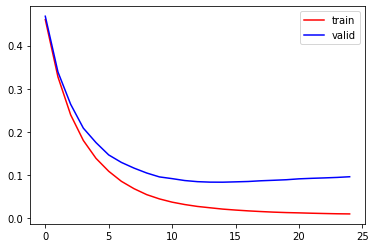

In [19]:
# 学習過程を可視化
import matplotlib.pyplot as plt
plt.plot(results_dict["train"]["logloss"], color = "red", label = "train")
plt.plot(results_dict["valid"]["logloss"], color = "blue", label = "valid")
plt.legend()
plt.show()

In [20]:
# 予測結果
pred = model.predict(xgb.DMatrix(X_test))
print(pred)

"""  
predで予測結果を出力すると、0 or 1のラベルではなく、”ラベル１である確率”が得られる
"""

[0.9980229  0.99561536 0.99854493 0.99854493 0.99561536 0.03664416
 0.99854493 0.99264115 0.99854493 0.9982229  0.99854493 0.9982231
 0.9982231  0.99854493 0.99854493 0.9978302  0.99854493 0.9973828
 0.99854493 0.99854493 0.99705553 0.9982229  0.99854493 0.99779415
 0.99854493 0.99680233 0.9965635  0.99854493 0.99854493 0.9982231
 0.99854493 0.9979917  0.99854493 0.99658316 0.9982231  0.99854493
 0.05169818 0.99854493 0.00554731 0.99854493 0.00493221 0.9982231
 0.99854493 0.99854493 0.9982231  0.99758613 0.9952063  0.9980229
 0.99854493 0.9980229  0.99854493 0.88957465 0.99854493 0.9982231
 0.99854493 0.9968051  0.9980229  0.03195928 0.99854493 0.40259168
 0.9962214  0.99561536 0.99561536 0.99370956 0.9961361  0.9982231
 0.9939553  0.81316864 0.28773603 0.9982231  0.9976782  0.99854493
 0.9956393  0.9952063  0.9982231  0.99117005 0.01031011 0.9982229
 0.99854493 0.9961021 ]


'  \npredで予測結果を出力すると、0 or 1のラベルではなく、”ラベル１である確率”が得られる\n'

In [21]:
# numpyのwhereを使って確率0.5以上のデータをラベル１にする
import numpy as np
label = np.where(pred > 0.5, 1, 0)
print(label)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1]


#### ランダムフォレストの結果
- test_score = 0.998641304347826

In [22]:
# AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pred)
print(auc)

0.9593114241001565
